In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset
df = pd.read_csv("data/dataset.csv")

In [3]:
# Split the data into separate columns
df = df['session;newsletter_abo;checkout;addtocart;eingeloeste_rabatte;analytics_referer_type;produktkategorie_interesse;purchase;wishlist;geschlecht;alter;analytics_campaign_source'].str.split(';', expand=True)

# Set the column names
df.columns = ['session', 'newsletter_abo', 'checkout', 'addtocart', 'eingeloeste_rabatte', 'analytics_referer_type', 'produktkategorie_interesse', 'purchase', 'wishlist', 'geschlecht', 'alter', 'analytics_campaign_source']

# Convert columns to appropriate data types
df[['session', 'newsletter_abo', 'checkout', 'addtocart', 'eingeloeste_rabatte', 'purchase', 'wishlist']] = df[['session', 'newsletter_abo', 'checkout', 'addtocart', 'eingeloeste_rabatte', 'purchase', 'wishlist']].apply(pd.to_numeric)

In [4]:
# Print some general information about the dataset
print(f"Values: {len(df)}")

num_unique_rows = df.drop_duplicates().shape[0]
print(f"Number of unique values: {num_unique_rows}")

print("\nColumns:")
for column in df.columns:
    print(f"- {column}")

# Print data types and missing values
print("\nData types and missing values:")
info_df = pd.DataFrame(df.dtypes, columns=['Datentyp'])
info_df['Missing values'] = df.isnull().sum()
info_df['Unique values'] = df.nunique()
print(info_df)

# Print some statistics
print("\nFirst 5 rows:")
print(df.head())

Values: 1111
Number of unique values: 1035

Columns:
- session
- newsletter_abo
- checkout
- addtocart
- eingeloeste_rabatte
- analytics_referer_type
- produktkategorie_interesse
- purchase
- wishlist
- geschlecht
- alter
- analytics_campaign_source

Data types and missing values:
                           Datentyp  Missing values  Unique values
session                       int64               0             72
newsletter_abo                int64               0              2
checkout                      int64               0              2
addtocart                     int64               0              2
eingeloeste_rabatte           int64               0              2
analytics_referer_type       object               0              4
produktkategorie_interesse   object               0              3
purchase                      int64               0              2
wishlist                      int64               0              2
geschlecht                   object             

In [5]:
df = pd.get_dummies(df, columns=['analytics_referer_type', 'produktkategorie_interesse', 'geschlecht', 'analytics_campaign_source'])

In [6]:
print(df.head())

   session  newsletter_abo  checkout  addtocart  eingeloeste_rabatte  \
0       50               0         0          0                    1   
1       40               0         1          1                    0   
2       40               0         0          0                    0   
3       20               0         1          1                    1   
4       20               0         1          1                    0   

   purchase  wishlist alter  analytics_referer_type_campaign  \
0         1         0    23                            False   
1         0         0    44                            False   
2         0         0    55                            False   
3         1         0    32                             True   
4         1         1    46                            False   

   analytics_referer_type_direct  ...  produktkategorie_interesse_Traubensaft  \
0                           True  ...                                   False   
1                   

In [7]:
unique_sessions = df["session"].nunique()
print(f"Unique Sessions: {unique_sessions}")

Unique Sessions: 72


In [8]:
session_counts = df["session"].value_counts()
print(session_counts)

session
20      326
10      168
30      140
40      108
50       63
       ... 
133       1
134       1
135       1
136       1
5000      1
Name: count, Length: 72, dtype: int64


In [9]:
top_20_sessions = df.nlargest(30, 'session')
print(top_20_sessions)


      session  newsletter_abo  checkout  addtocart  eingeloeste_rabatte  \
663      6000               0         1          1                    1   
689      5000               0         1          1                    0   
696      3000               0         0          0                    0   
902      2000               0         0          0                    0   
1051      500               0         1          1                    1   
1058      500               0         0          1                    0   
1067      500               0         1          1                    1   
1075      500               0         1          1                    1   
315       470               0         0          1                    0   
21        410               0         1          1                    1   
27        400               0         1          1                    1   
1016      400               1         1          1                    1   
1021      400            

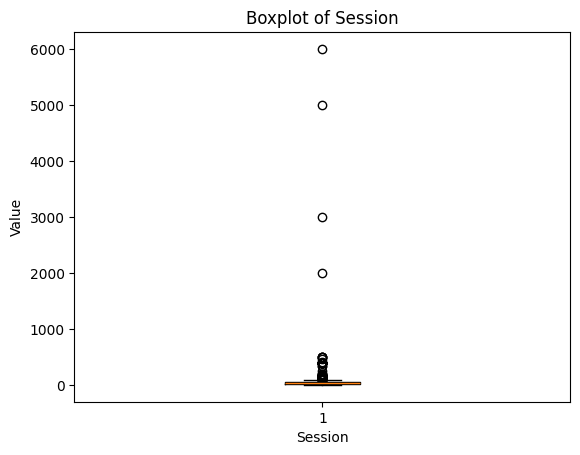

In [10]:
plt.boxplot(df['session'])
plt.xlabel('Session')
plt.ylabel('Value')
plt.title('Boxplot of Session')
plt.show()


In [11]:
df = df[df['session'] <= 200]


In [12]:
df['alter'] = df['alter'].astype(int)

top_20_alter = df.nlargest(20, 'alter')
print(top_20_alter)

      session  newsletter_abo  checkout  addtocart  eingeloeste_rabatte  \
10         12               0         0          0                    0   
507        10               0         0          0                    0   
536        20               0         0          0                    0   
557        23               0         0          0                    0   
604        30               0         1          1                    0   
1038       20               0         0          1                    0   
1060       30               0         1          1                    1   
1092        5               0         1          1                    1   
13         30               0         0          0                    0   
178        20               1         0          0                    0   
386        10               0         1          1                    0   
514        40               0         1          0                    0   
799        30            

In [13]:
low_20_alter = df.nsmallest(20, 'alter')
print(low_20_alter)

      session  newsletter_abo  checkout  addtocart  eingeloeste_rabatte  \
232        20               0         0          0                    0   
251        20               0         0          0                    0   
333        20               0         0          0                    0   
440        20               0         0          0                    0   
459        20               0         1          0                    0   
645        40               0         0          0                    0   
664        10               0         0          0                    0   
746        60               0         1          1                    1   
861        30               0         1          1                    0   
880        20               0         1          1                    1   
962       160               0         1          1                    1   
1080       10               0         1          1                    1   
16         10            

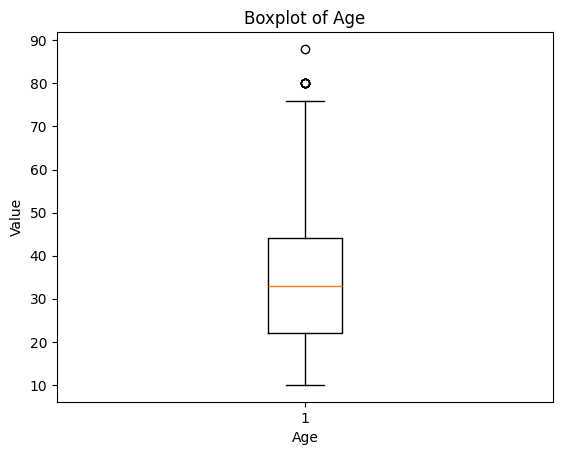

In [14]:
plt.boxplot(df['alter'])
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Boxplot of Age')
plt.show()

In [15]:
df = df[df['alter'] >= 18]

In [16]:
print(df.head())

   session  newsletter_abo  checkout  addtocart  eingeloeste_rabatte  \
0       50               0         0          0                    1   
1       40               0         1          1                    0   
2       40               0         0          0                    0   
3       20               0         1          1                    1   
4       20               0         1          1                    0   

   purchase  wishlist  alter  analytics_referer_type_campaign  \
0         1         0     23                            False   
1         0         0     44                            False   
2         0         0     55                            False   
3         1         0     32                             True   
4         1         1     46                            False   

   analytics_referer_type_direct  ...  produktkategorie_interesse_Traubensaft  \
0                           True  ...                                   False   
1             

In [17]:
bool_columns = df.select_dtypes(include=bool).columns
df[bool_columns] = df[bool_columns].astype(int)


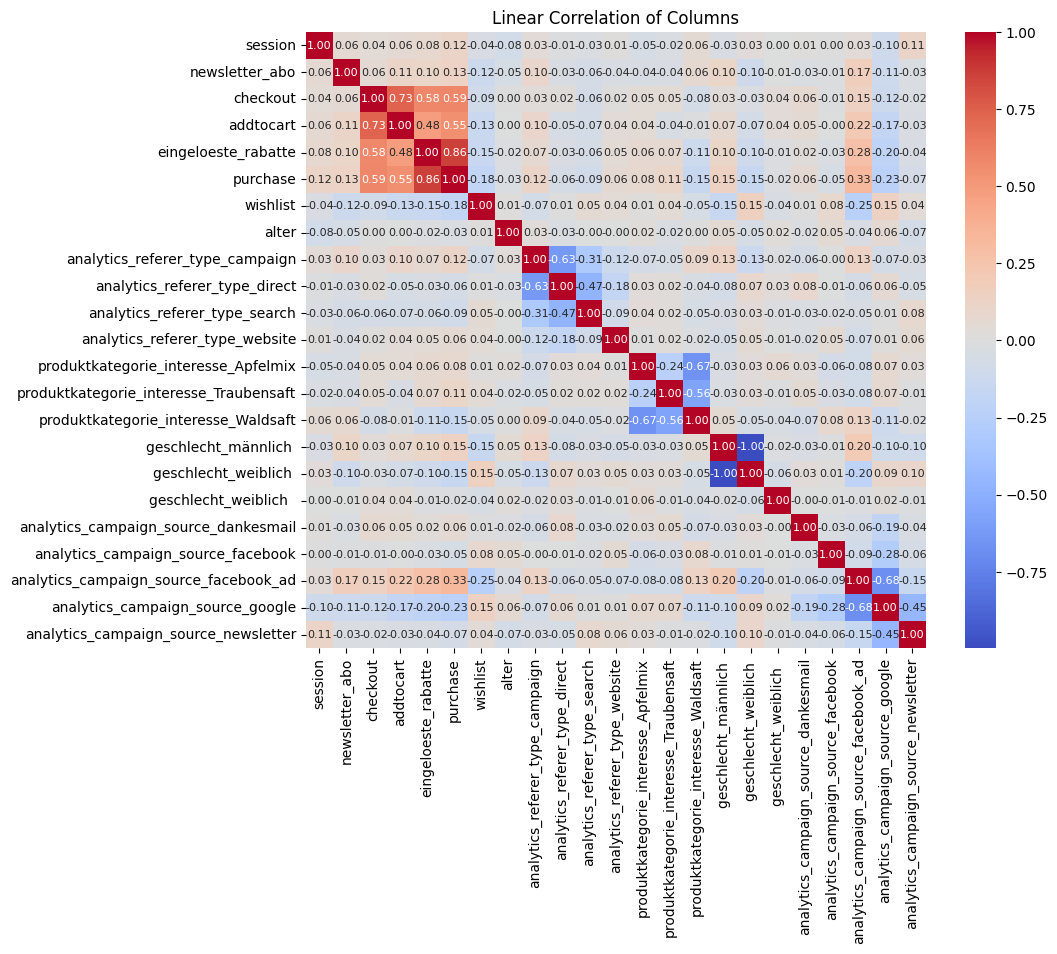

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Linear Correlation of Columns')
plt.show()


In [19]:
df['geschlecht_weiblich '] = df['geschlecht_weiblich '] | df['geschlecht_weiblich  ']
df.drop(columns=['geschlecht_weiblich  '], inplace=True)


In [20]:
df.rename(columns={'geschlecht_männlich ': 'geschlecht_männlich'}, inplace=True)
df.rename(columns={'geschlecht_weiblich ': 'geschlecht_weiblich'}, inplace=True)


In [21]:
print(df.head())

   session  newsletter_abo  checkout  addtocart  eingeloeste_rabatte  \
0       50               0         0          0                    1   
1       40               0         1          1                    0   
2       40               0         0          0                    0   
3       20               0         1          1                    1   
4       20               0         1          1                    0   

   purchase  wishlist  alter  analytics_referer_type_campaign  \
0         1         0     23                                0   
1         0         0     44                                0   
2         0         0     55                                0   
3         1         0     32                                1   
4         1         1     46                                0   

   analytics_referer_type_direct  ...  produktkategorie_interesse_Apfelmix  \
0                              1  ...                                    0   
1                   

In [22]:
columns_to_drop = ['checkout', 'eingeloeste_rabatte', 'wishlist', 'analytics_referer_type_campaign', 'analytics_referer_type_direct', 'analytics_referer_type_search', 'analytics_referer_type_website', 'analytics_campaign_source_dankesmail', 'analytics_campaign_source_facebook', 'analytics_campaign_source_facebook_ad', 'analytics_campaign_source_google', 'analytics_campaign_source_newsletter']
df.drop(columns=columns_to_drop, inplace=True)


In [23]:
print(df.head())

   session  newsletter_abo  addtocart  purchase  alter  \
0       50               0          0         1     23   
1       40               0          1         0     44   
2       40               0          0         0     55   
3       20               0          1         1     32   
4       20               0          1         1     46   

   produktkategorie_interesse_Apfelmix  \
0                                    0   
1                                    1   
2                                    0   
3                                    0   
4                                    0   

   produktkategorie_interesse_Traubensaft  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   produktkategorie_interesse_Waldsaft  geschlecht_männlich  \
0                                    1                    1   
1

In [24]:
# Multiply the three produktkategorie columns with the session column
df['produktkategorie_interesse_Apfelmix_scaled'] = df['produktkategorie_interesse_Apfelmix'] * df['session']
df['produktkategorie_interesse_Traubensaft_scaled'] = df['produktkategorie_interesse_Traubensaft'] * df['session']
df['produktkategorie_interesse_Waldsaft_scaled'] = df['produktkategorie_interesse_Waldsaft'] * df['session']

# Normalize the scaled values
max_session = df['session'].max()
df['produktkategorie_interesse_Apfelmix_scaled'] = df['produktkategorie_interesse_Apfelmix_scaled'] / max_session
df['produktkategorie_interesse_Traubensaft_scaled'] = df['produktkategorie_interesse_Traubensaft_scaled'] / max_session
df['produktkategorie_interesse_Waldsaft_scaled'] = df['produktkategorie_interesse_Waldsaft_scaled'] / max_session

# Drop the original columns
df.drop(columns=['session'], inplace=True)

# Print the updated dataframe
print(df.head())


   newsletter_abo  addtocart  purchase  alter  \
0               0          0         1     23   
1               0          1         0     44   
2               0          0         0     55   
3               0          1         1     32   
4               0          1         1     46   

   produktkategorie_interesse_Apfelmix  \
0                                    0   
1                                    1   
2                                    0   
3                                    0   
4                                    0   

   produktkategorie_interesse_Traubensaft  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   produktkategorie_interesse_Waldsaft  geschlecht_männlich  \
0                                    1                    1   
1                                    0                 

In [25]:

# Drop male gender to avoid redundancy
# df.drop(columns=['geschlecht_männlich'], inplace=True)

# Scale the age column
scaler = MinMaxScaler()
scaled_age = scaler.fit_transform(df[['alter']])
df['alter'] = scaled_age

# Create a copy of the dataframe with normal produktkategorie columns
df_normal = df.copy()
df_normal.drop(columns=['produktkategorie_interesse_Apfelmix_scaled', 'produktkategorie_interesse_Traubensaft_scaled', 'produktkategorie_interesse_Waldsaft_scaled'], inplace=True)

# Create a copy of the dataframe with scaled produktkategorie columns
df_scaled = df.copy()
df_scaled.drop(columns=['produktkategorie_interesse_Apfelmix', 'produktkategorie_interesse_Traubensaft', 'produktkategorie_interesse_Waldsaft'], inplace=True)

# Print the updated dataframe
print(df_normal.head())

print(df_scaled.head())

   newsletter_abo  addtocart  purchase     alter  \
0               0          0         1  0.071429   
1               0          1         0  0.371429   
2               0          0         0  0.528571   
3               0          1         1  0.200000   
4               0          1         1  0.400000   

   produktkategorie_interesse_Apfelmix  \
0                                    0   
1                                    1   
2                                    0   
3                                    0   
4                                    0   

   produktkategorie_interesse_Traubensaft  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   produktkategorie_interesse_Waldsaft  geschlecht_männlich  \
0                                    1                    1   
1                                    

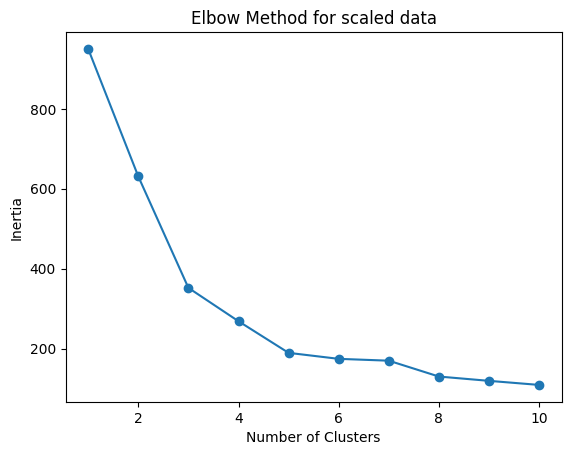

In [26]:
k_values = range(1, 11)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for scaled data')
plt.show()

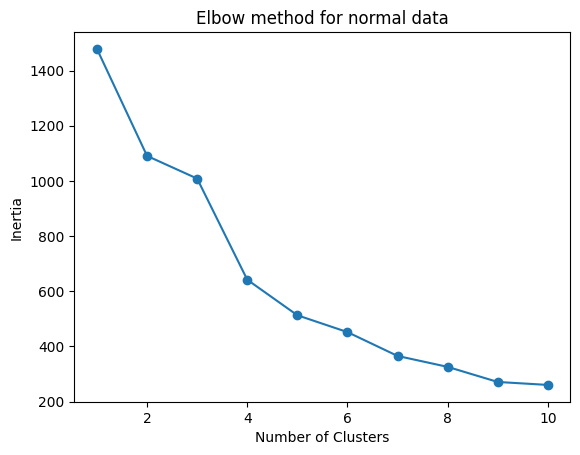

In [27]:
k_values = range(1, 11)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normal)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for normal data')
plt.show()

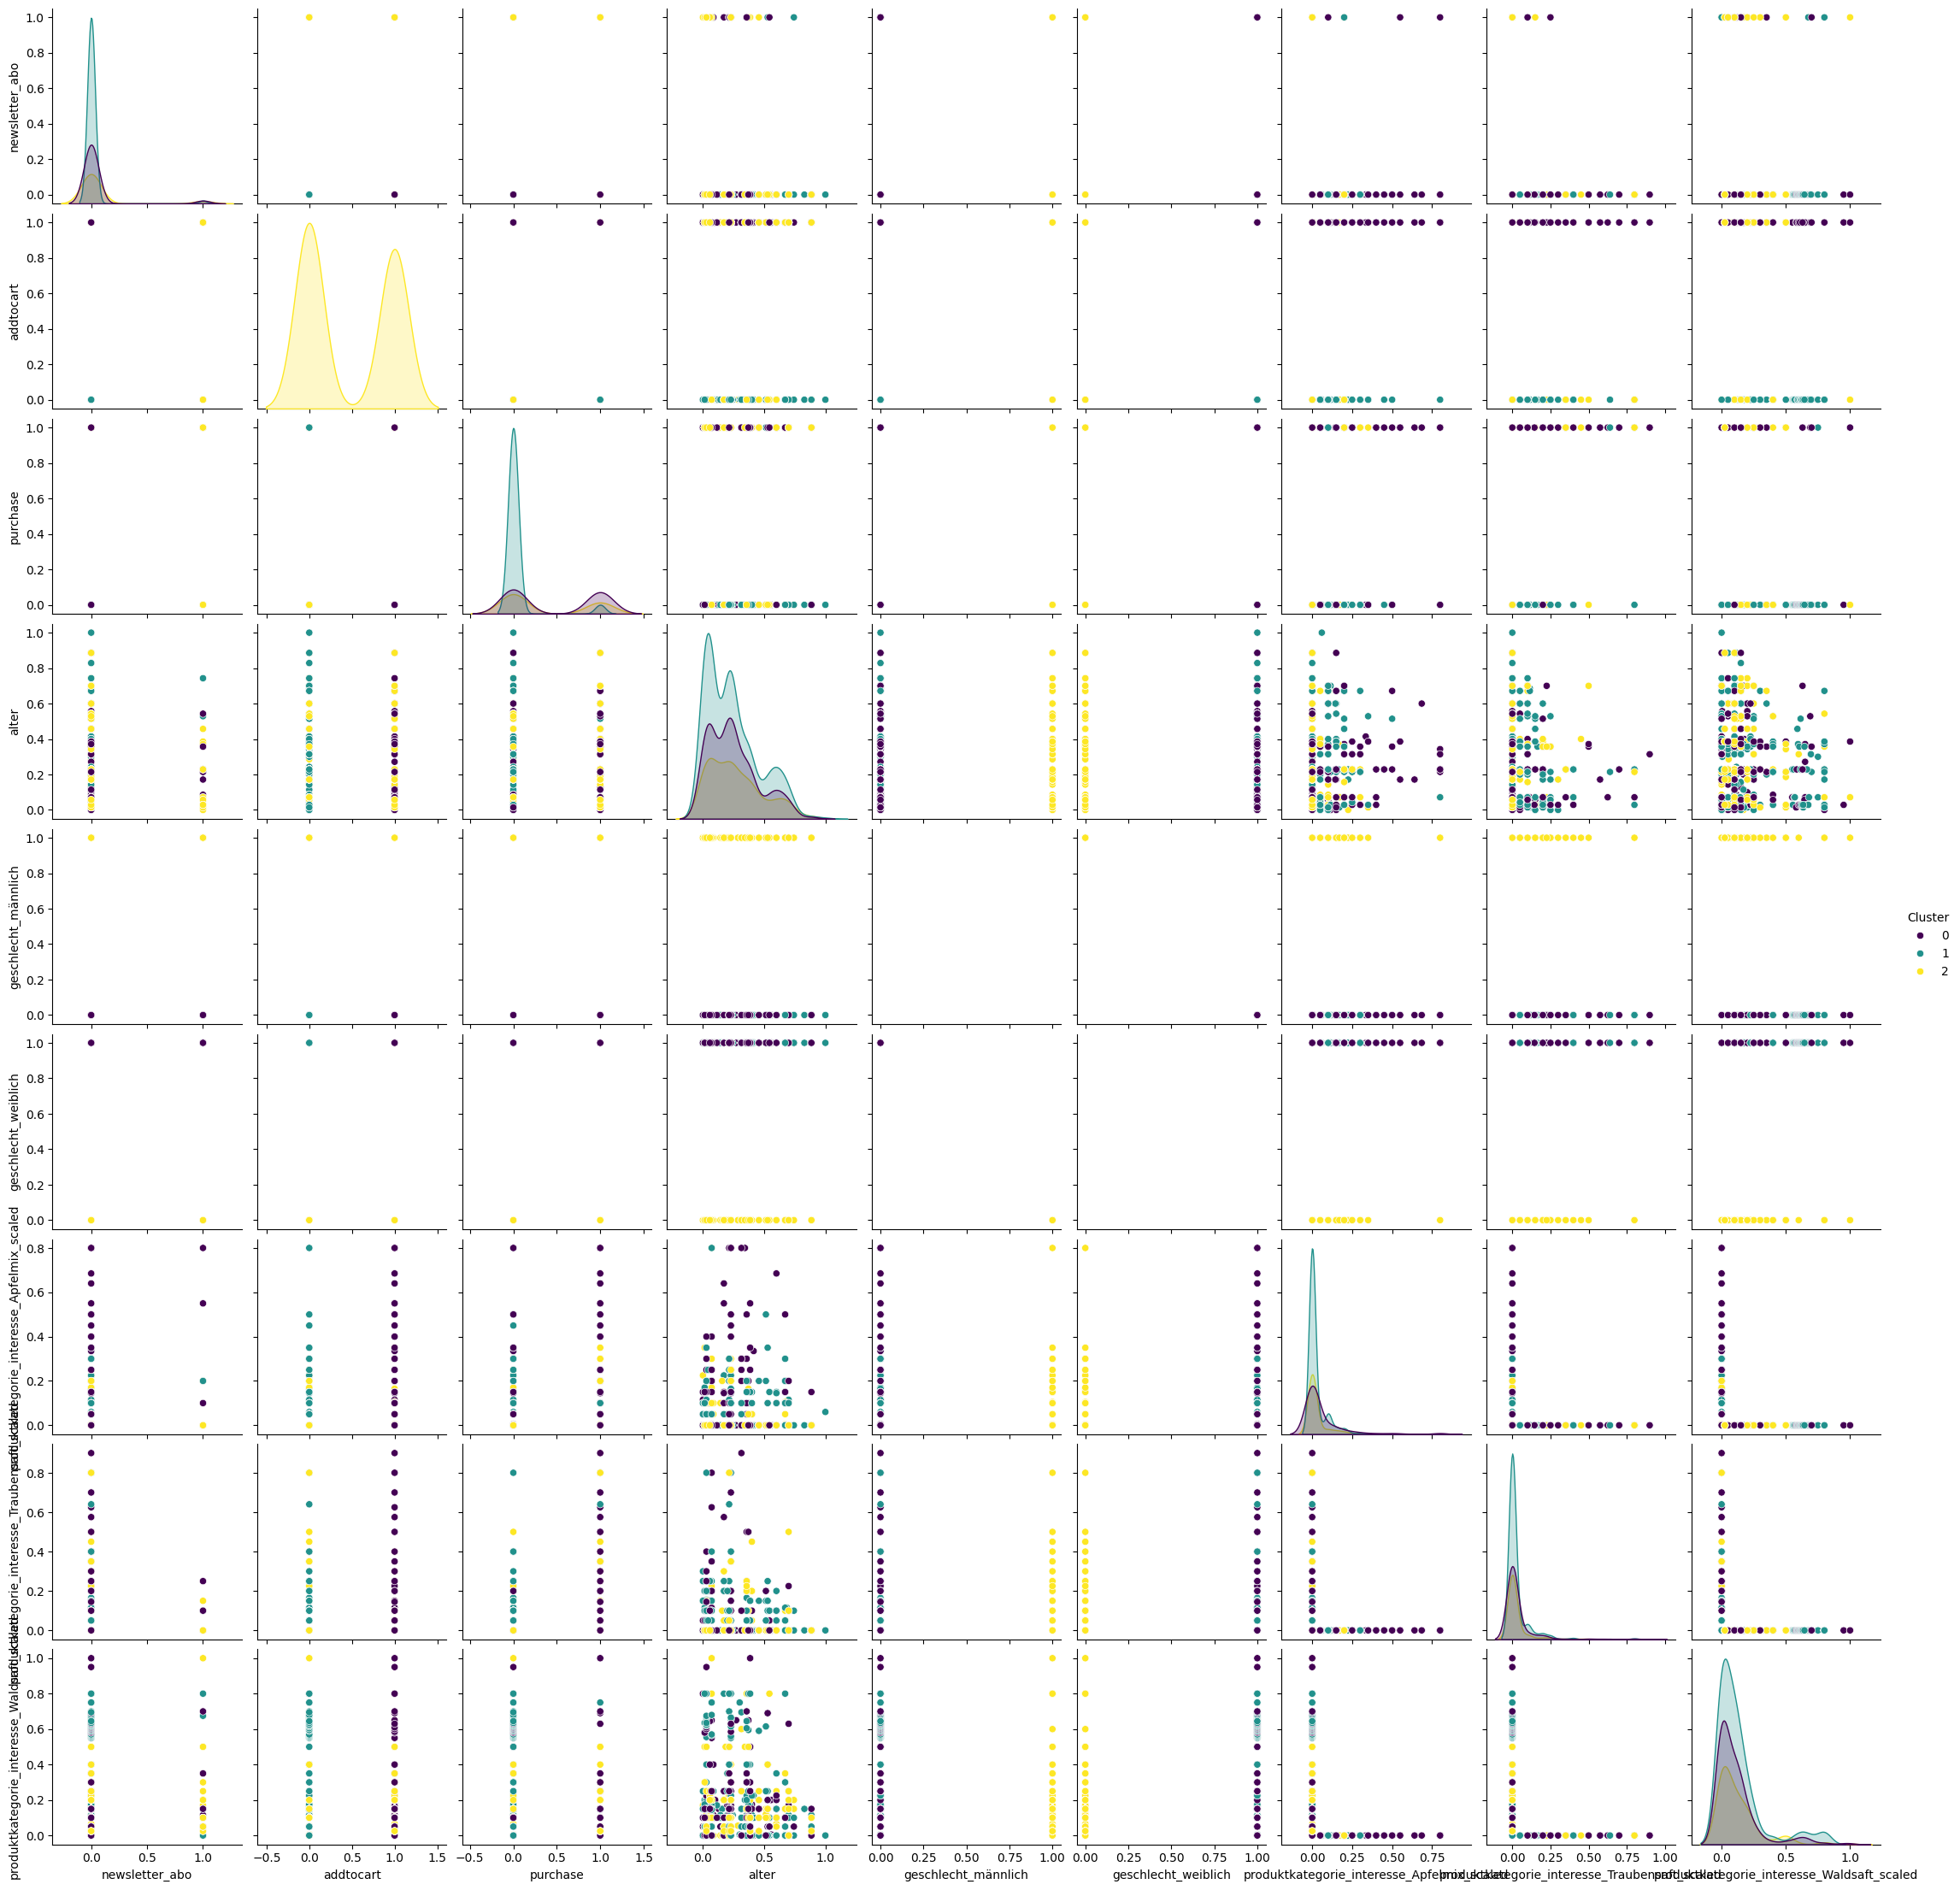

In [28]:
# Fit the KMeans algorithm to the data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.predict(df_scaled)

# Add the cluster labels as a new column in the dataframe
df_scaled['Cluster'] = cluster_labels

# Visualize the clusters using a scatter plot matrix
sns.pairplot(df_scaled, hue='Cluster', palette='viridis')
plt.show()



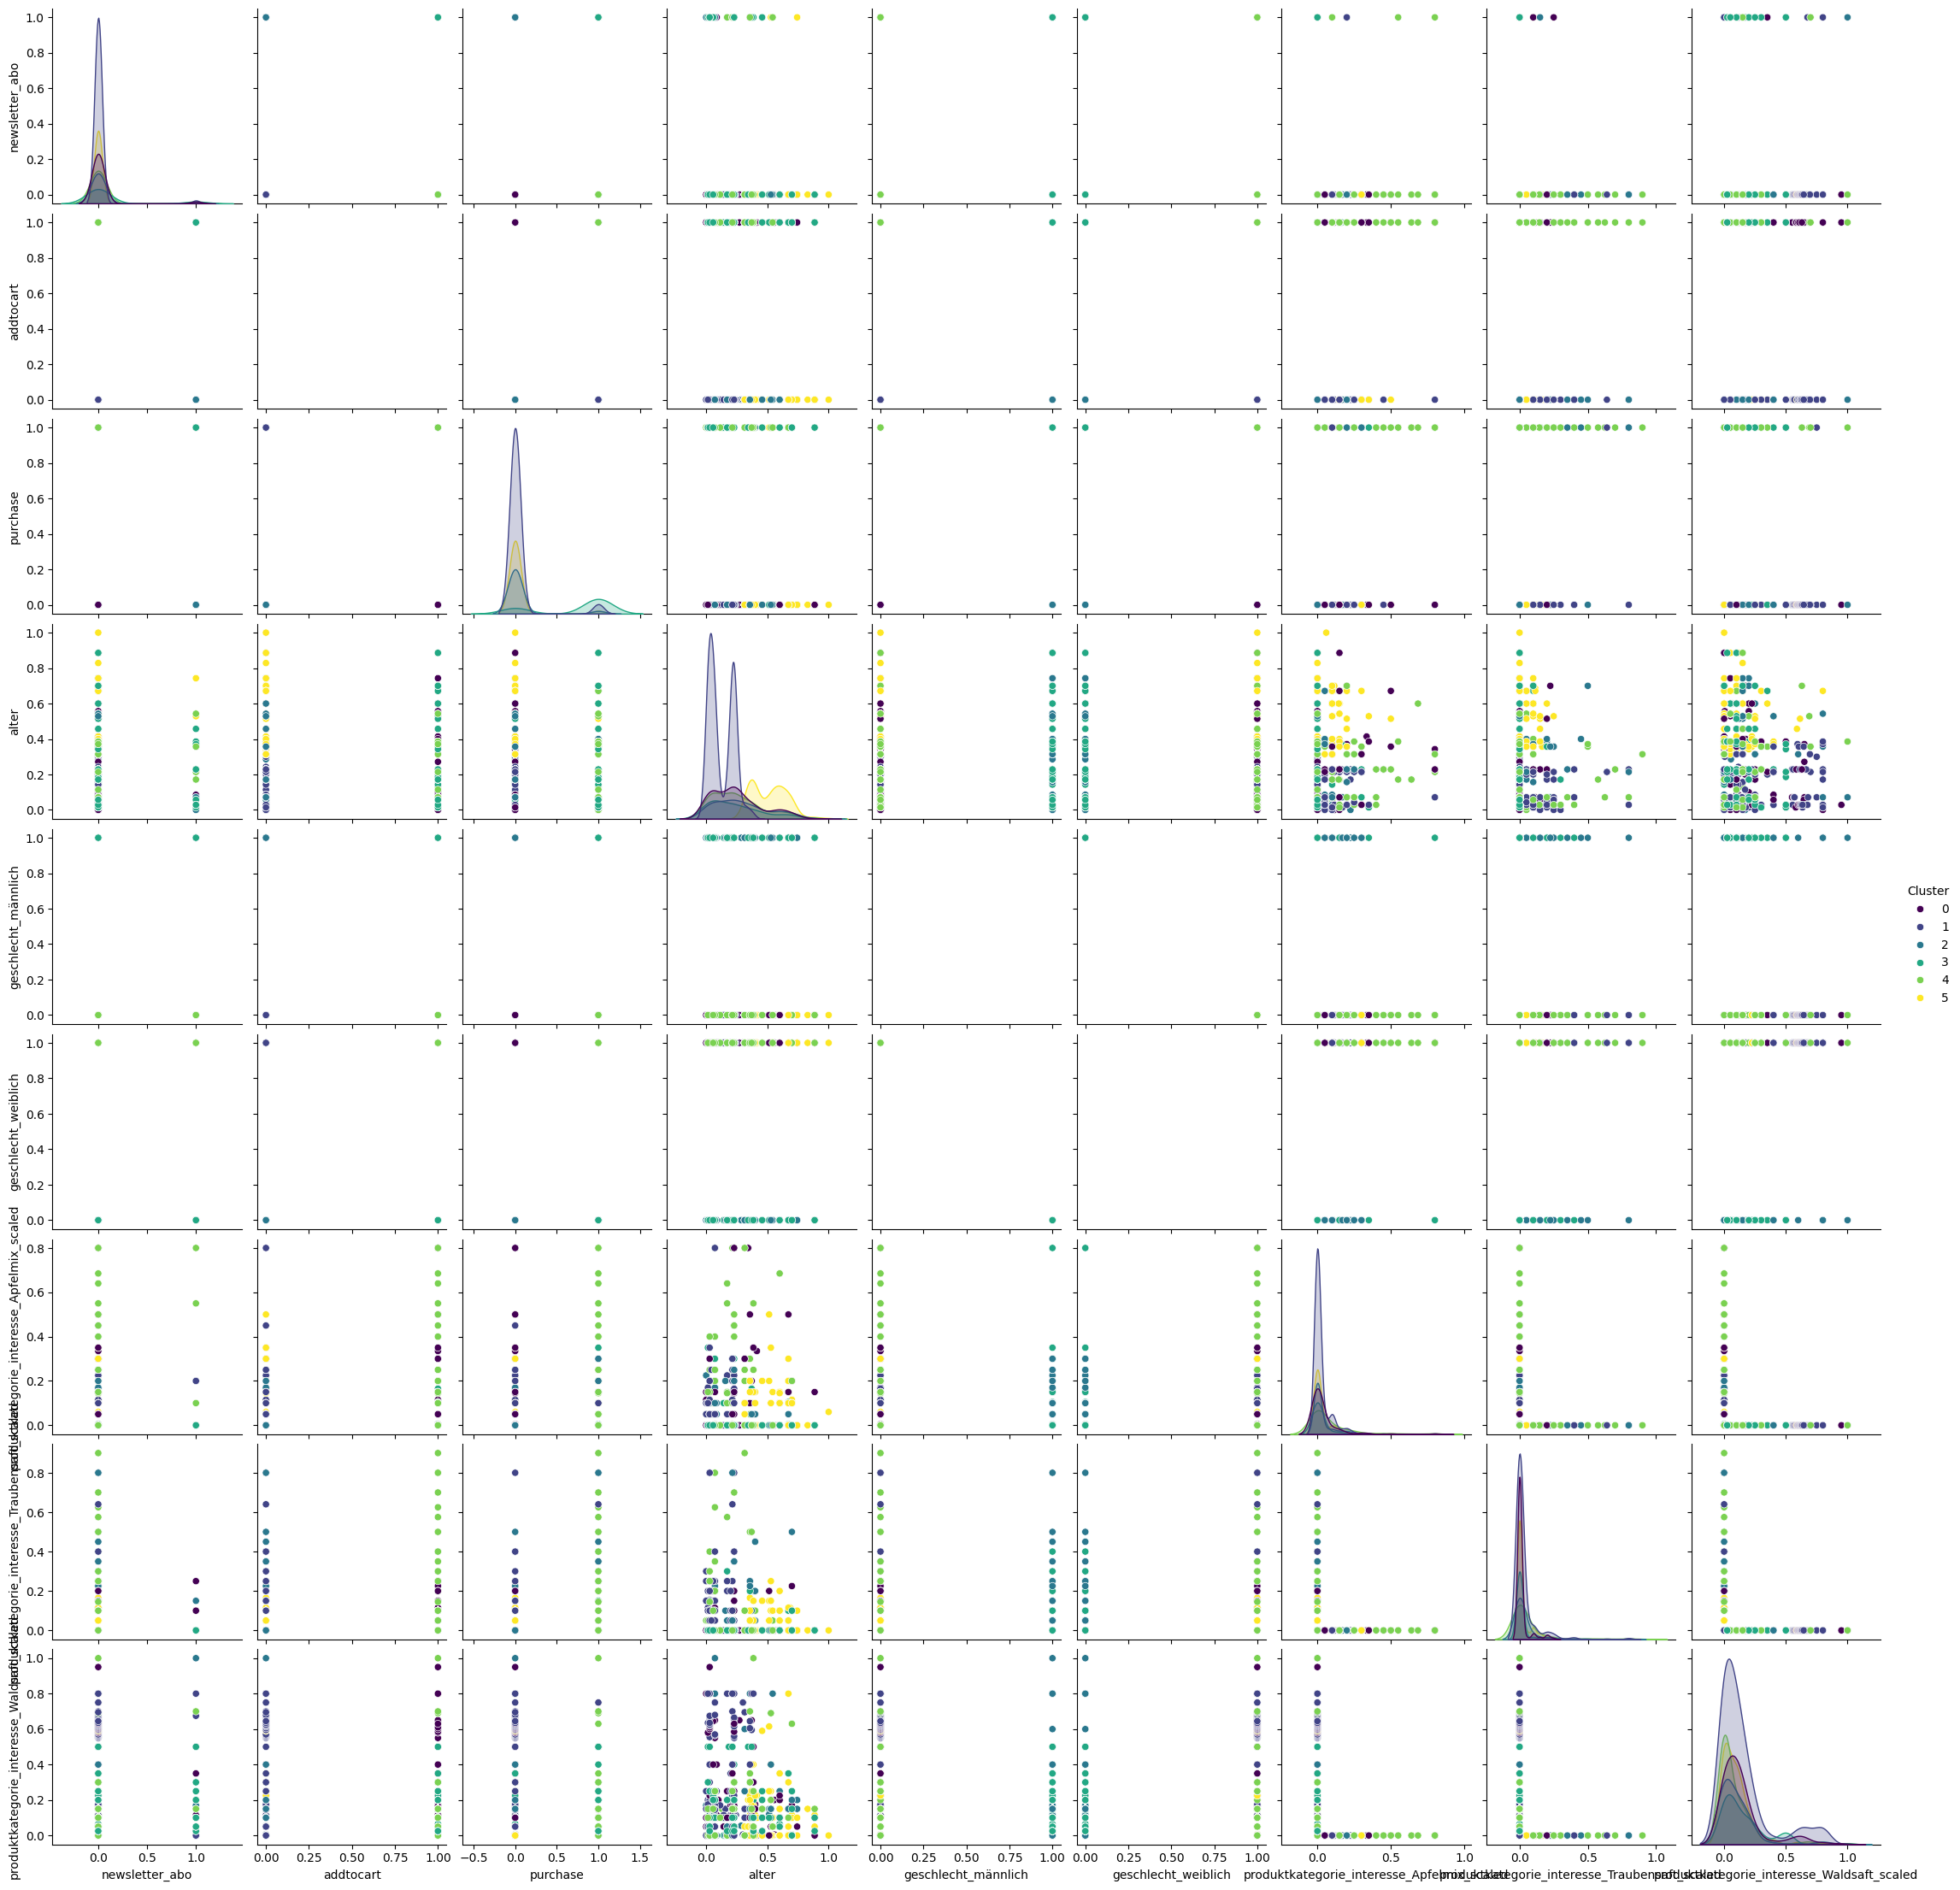

In [29]:
# Fit the KMeans algorithm to the data
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.predict(df_scaled)

# Add the cluster labels as a new column in the dataframe
df_scaled['Cluster'] = cluster_labels

# Visualize the clusters using a scatter plot matrix
sns.pairplot(df_scaled, hue='Cluster', palette='viridis')
plt.show()

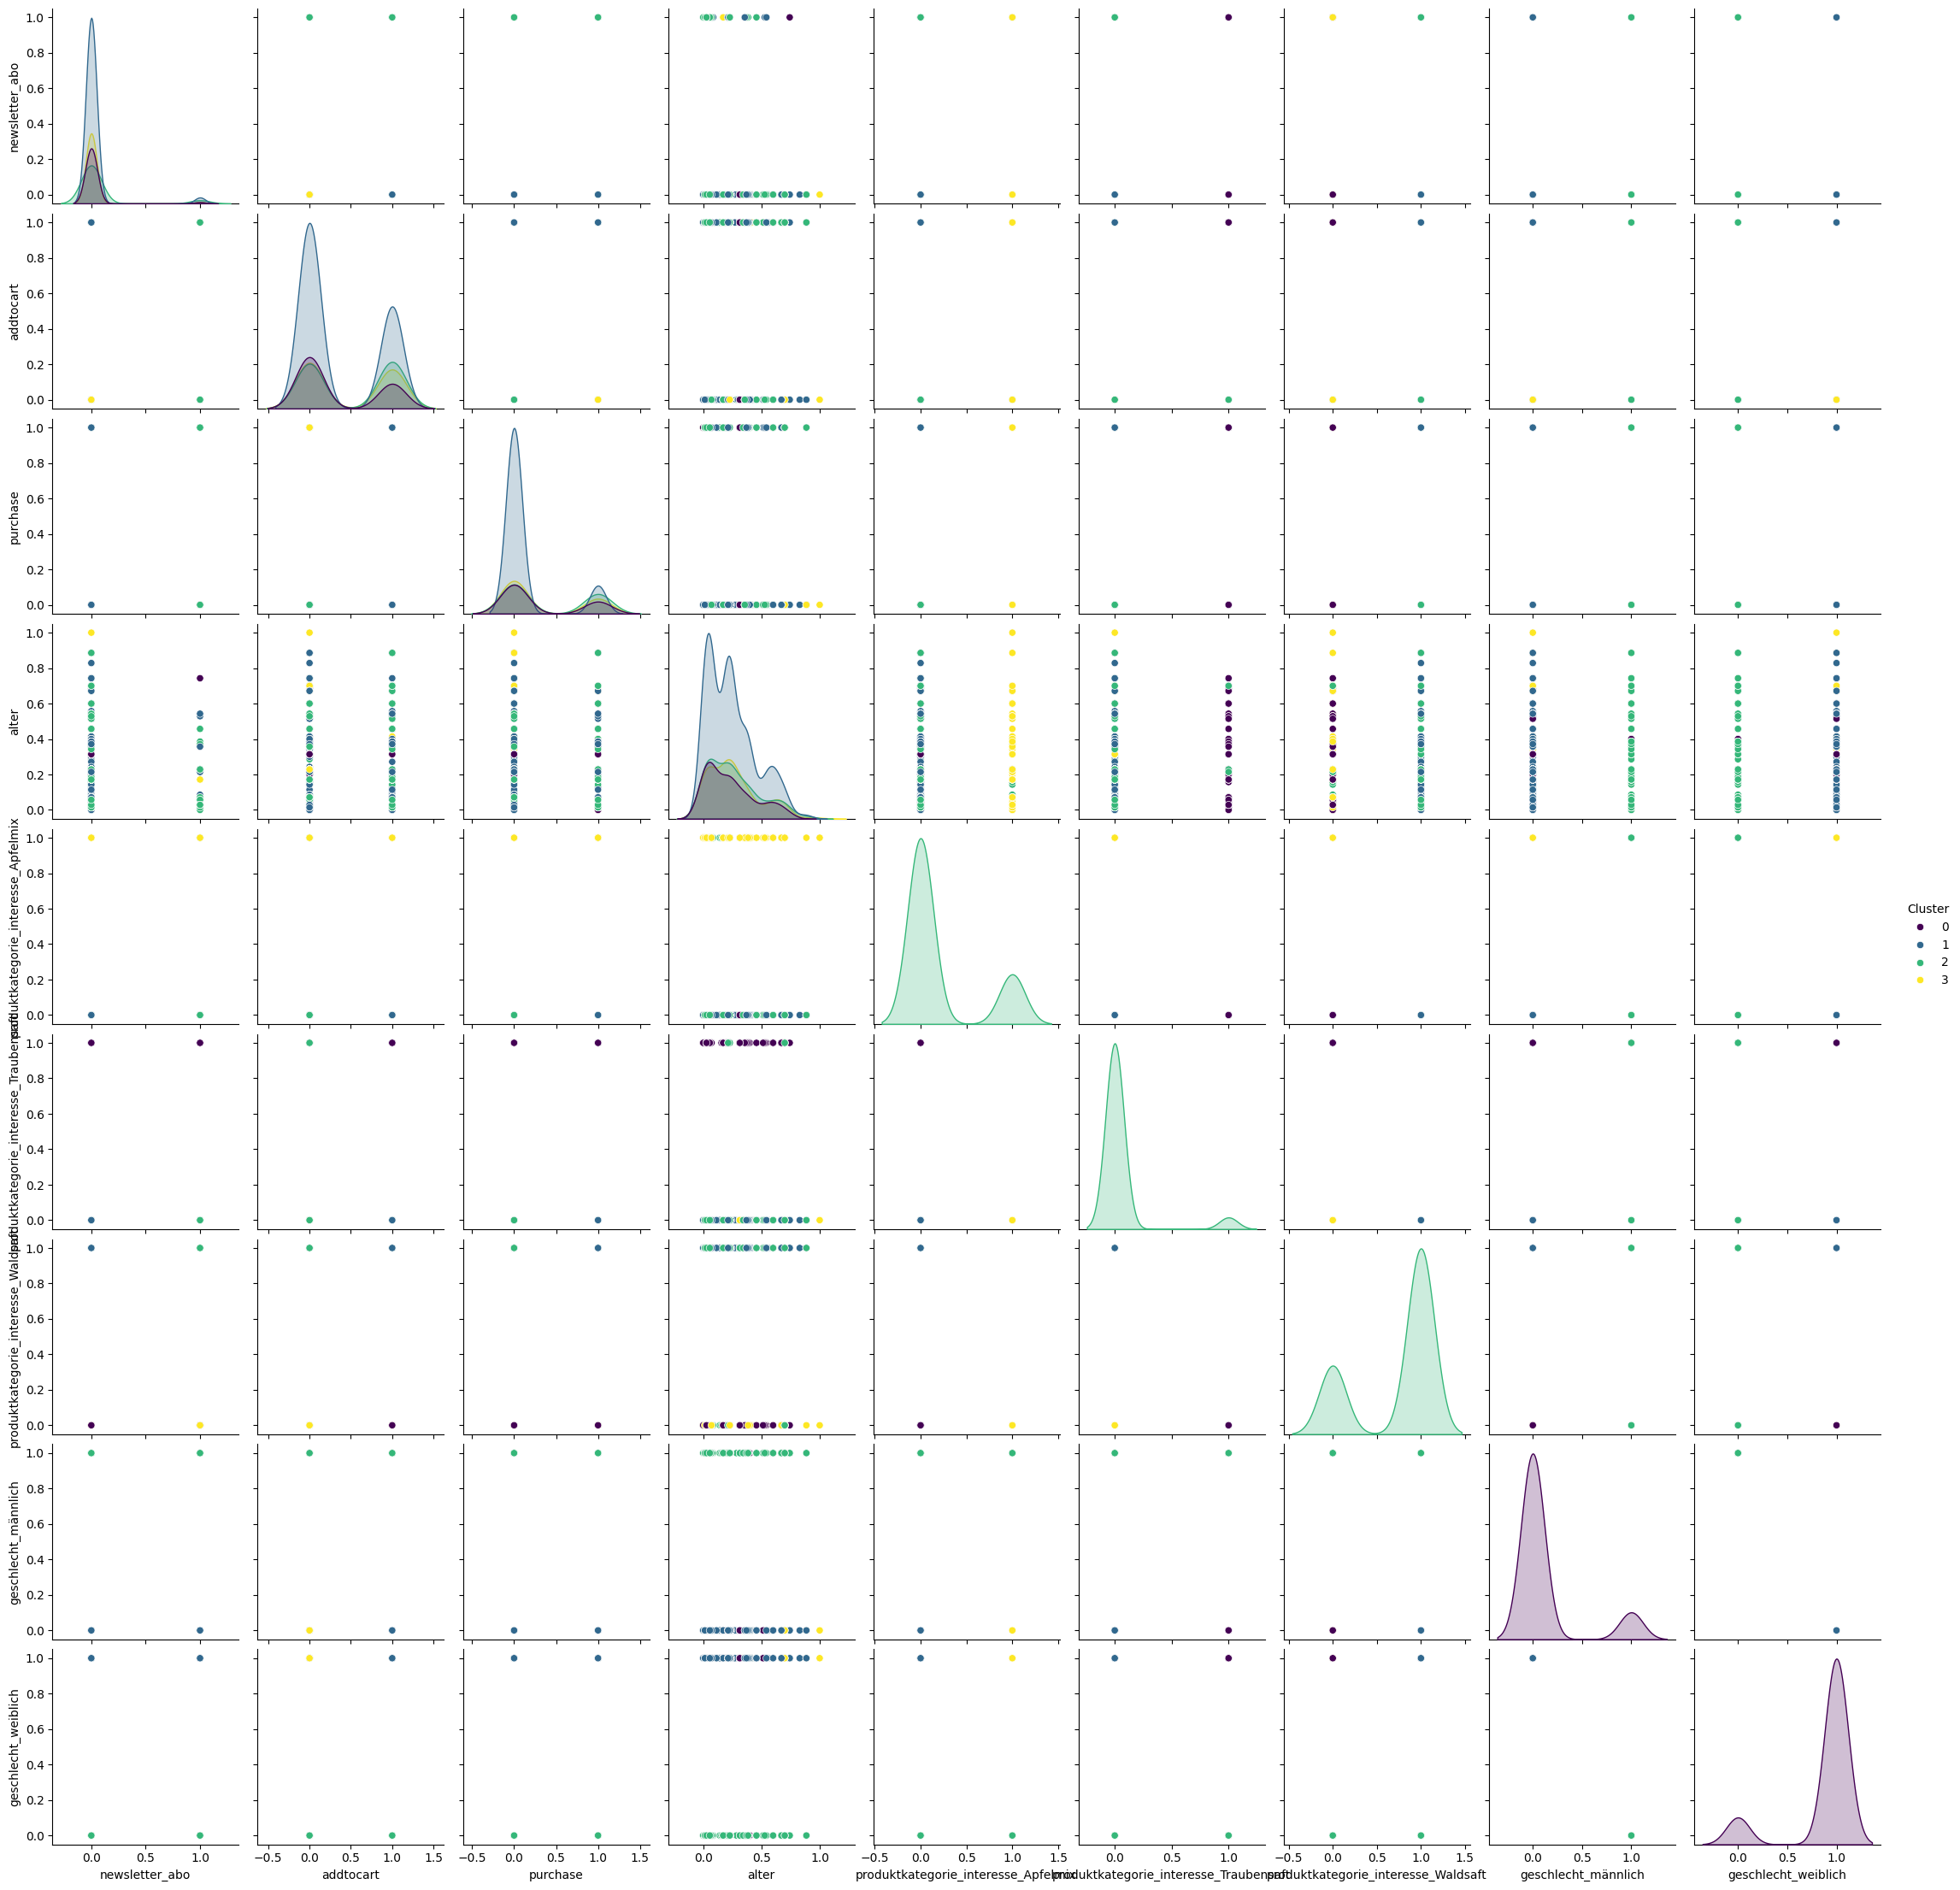

In [30]:
# Fit the KMeans algorithm to the data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normal)

# Get the cluster labels for each data point
cluster_labels = kmeans.predict(df_normal)

# Add the cluster labels as a new column in the dataframe
df_normal['Cluster'] = cluster_labels

# Visualize the clusters using a scatter plot matrix
sns.pairplot(df_normal, hue='Cluster', palette='viridis')
plt.show()